A note about the organization of this notebook: In my previous step, data wrangling, I did a lot of work preparing the data to be used in models. In this notebook I realized some of the data would be easier to use in EDA in its original form. So I ended up using a combination of the raw data  (unprocessed_df) and my model ready data (preprocessed_df).

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = os.getcwd()
file_name = 'fake_job_postings_preprocessed.csv'
path += "/../data/interim/"+file_name
df_preprocessed = pd.read_csv(path, index_col='job_id')

path = os.getcwd()
file_name = 'fake_job_postings.csv'
path += "/../data/raw/"+file_name
df_unprocessed = pd.read_csv(path, index_col='job_id')

In [2]:
df_unprocessed.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df_preprocessed.head()

,telecommuting,has_company_logo,has_questions,fraudulent,has_department,has_salary_range,has_benefits,has_required_experience,has_required_education,Country_CA,...,function_Information Technology,function_Marketing,function_Other,function_Sales,company_profile,description,requirements,company_profile_length,description_length,requirements_length
job_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,"['food', 'weve', 'created', 'groundbreaking', ...","['food', 'fastgrowing', 'james', 'beard', 'awa...","['experience', 'content', 'management', 'syste...",88,79,73
2,0,1,0,0,1,0,1,1,0,0,...,0,0,0,0,"['second', 'world', 'cloud', 'video', 'product...","['organised', 'focused', 'vibrant', 'awesomedo...","['expect', 'youyour', 'key', 'responsibility',...",99,192,119
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,"['valor', 'service', 'provides', 'workforce', ...","['client', 'located', 'houston', 'actively', '...","['implement', 'precommissioning', 'commissioni...",82,30,107
4,0,1,0,0,1,0,1,1,1,0,...,0,0,0,1,"['passion', 'improving', 'quality', 'life', 'g...","['company', 'esri', '–', 'environmental', 'sys...","['education', 'bachelor', '’', 'master', '’', ...",57,226,124
5,0,1,1,0,0,0,1,1,1,0,...,0,0,0,0,"['spotsource', 'solution', 'llc', 'global', 'h...","['job', 'title', 'itemization', 'review', 'man...","['qualificationsrn', 'license', 'state', 'texa...",151,126,62


In [4]:
loc_df = df_unprocessed.location
loc_df = loc_df.str.split(',', expand=True)[[0,1,2]]
loc_df.columns = ['Country','State','City']
df_unprocessed = df_unprocessed.join(loc_df) #adding useful location information

#splitting my dataframes into real/fake for comparison
df_preprocessed_real = df_preprocessed[df_preprocessed['fraudulent']==0]
df_preprocessed_fake = df_preprocessed[df_preprocessed['fraudulent']==1]
df_unprocessed_real = df_unprocessed[df_unprocessed['fraudulent']==0]
df_unprocessed_fake = df_unprocessed[df_unprocessed['fraudulent']==1]

The distributions of my only numeric columns

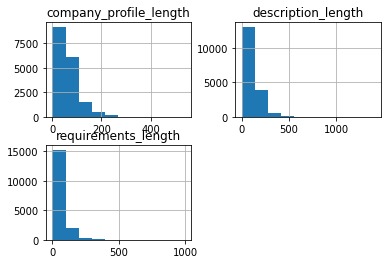

In [5]:
numeric_cols = ['company_profile_length', 'description_length', 'requirements_length']
df_preprocessed[numeric_cols].hist()
plt.show()

I'd like to compare the distributions of length for real vs fake postings:

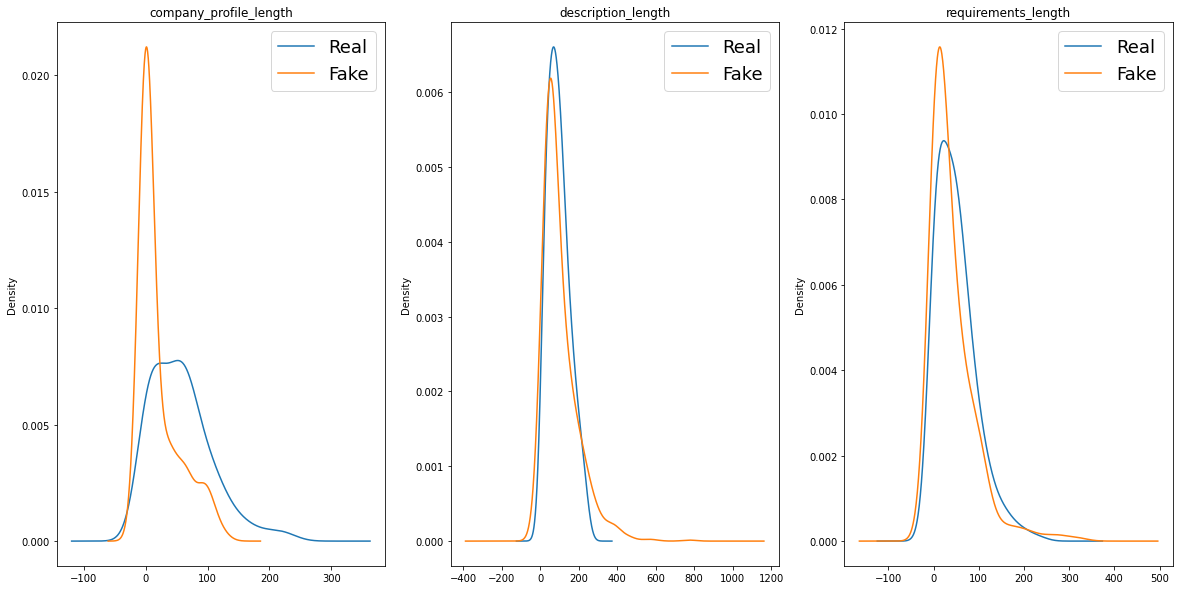

In [6]:
bandwidth = .4
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=.2)
for num, col in enumerate(numeric_cols):
    plt.subplot(int('13'+str(num+1))) #plot these in one row of 3 subplots
    plt.title(col)
    df_preprocessed_real[col][df_preprocessed_real[col]<250].plot.kde(bw_method=bandwidth)
    df_preprocessed_fake[col].plot.kde(bw_method=bandwidth)
    plt.legend(['Real','Fake'],fontsize=18)

Profile length looks to be the most different. All three variables look like they tend toward higher values for real and lower values for fake. Also fake is close to centered at 0 for all of them.

Box plots of the same data:

<AxesSubplot:>

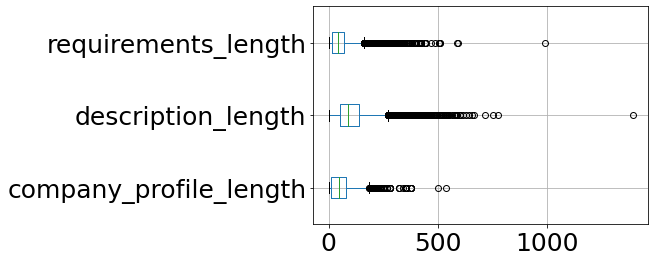

In [7]:
plt.clf()
df_preprocessed[numeric_cols].boxplot(vert=False, fontsize=25)

That's a lot of outliers! All are heavily right skewed. I am curious what the longest description_length entry is:

In [8]:
df_unprocessed.description[[df_preprocessed['description_length'].idxmax()]].values[0][:1000]

'Drinking Water/Wastewater Operator (Part-Time)\xa0Job Overview\xa0Apex is an environmental consulting firm that offers stable leadership and growth, views employees as valuable resources, and rewards success with competitive pay and benefits. \xa0We are seeking a self-motivated, part-time, dual-licensed California Grade II Wastewater Treatment Plant Operator and Drinking Water D2/T2 Operator to join our team in Shasta and Tehama Counties and become an integral part of our continued success story. The successful candidate will provide routine O&amp;M for private, small drinking water and wastewater facilities between Redding and Red Bluff.\xa0Responsibilities\xa0Position responsibilities include working independently to perform all routine O&amp;M duties, including but not limited to operation and control of pump, blower, valve settings; collection, preservation and recording of samples in compliance with permit; troubleshooting and diagnostic of upsets and treatment problems (e.g., in

In [9]:
#checking outliers
df = df_preprocessed
df_numeric = df_preprocessed[numeric_cols]
Q1 = df_numeric.quantile(.25) 
Q3 = df_numeric.quantile(.75)
IQR = Q3-Q1

dfno = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
dfno.shape

(15892, 86)

Dropping outliers leaves us with 16000 out of 18000 values, which seems reasonable

<AxesSubplot:>

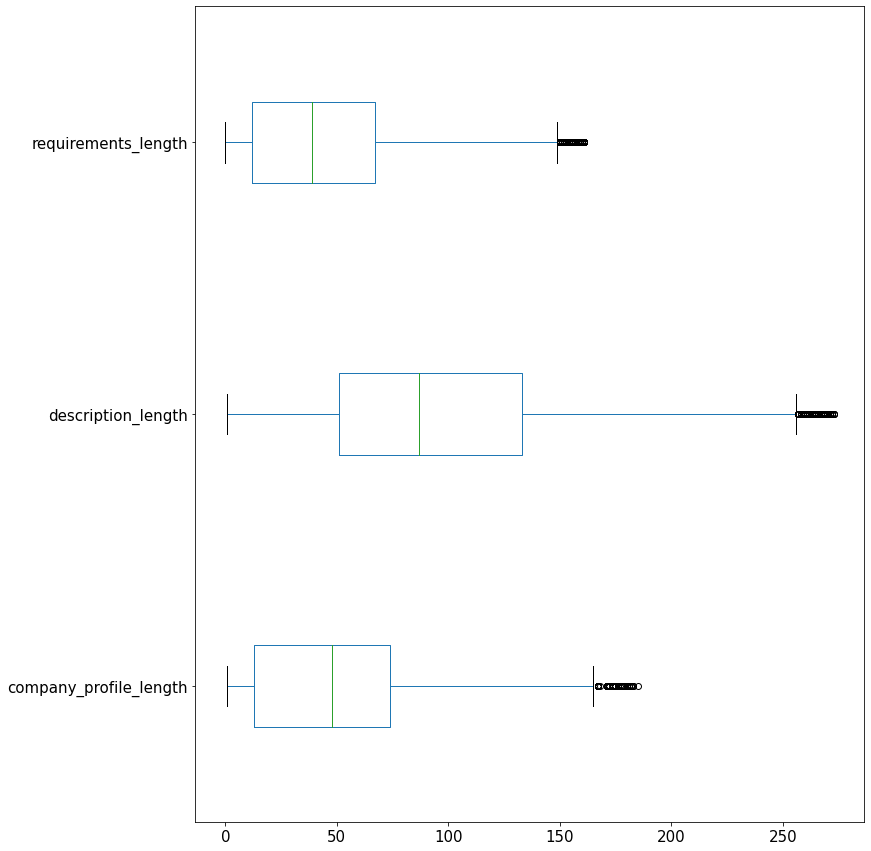

In [10]:
dfno[numeric_cols].boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

Looks clean now with the intial round of outliers removed

Plotting distribution of state and country

<AxesSubplot:title={'center':'State counts'}>

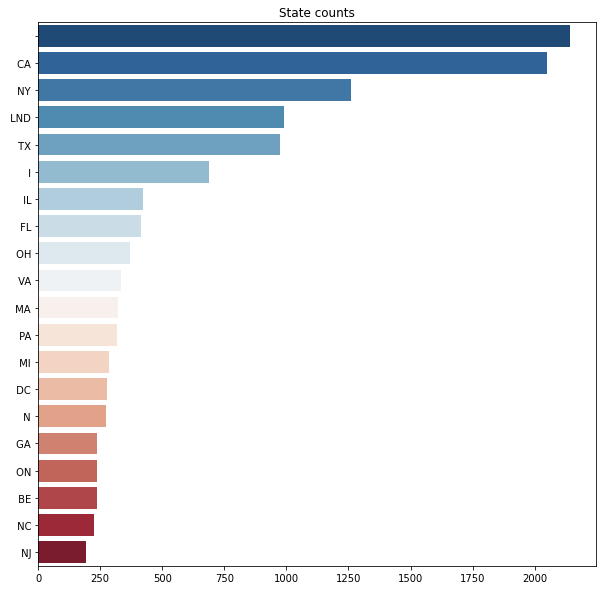

In [11]:
f, ax = plt.subplots(figsize=(10, 10))

x = pd.DataFrame(df_unprocessed.State.value_counts()[0:20])

names = list(x.index)

values = list(x.State)
plt.title('State counts')
sns.barplot(x=values, y=names, palette="RdBu_r")

Interesting to note that the most common state is none/blank. California, New York, London and Texas dominate.

<AxesSubplot:title={'center':'Country counts'}>

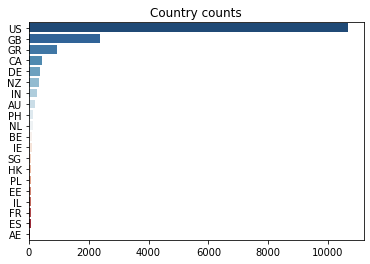

In [12]:
x = pd.DataFrame(df_unprocessed.Country.value_counts()[0:20])

names = list(x.index)

values = list(x.Country)

plt.title('Country counts')
sns.barplot(x=values, y=names, palette="RdBu_r")

United States and Great Britain dominate.

Now I'd like to see the breakdown of real vs fake by Country:

In [13]:
df = df_unprocessed[['fraudulent','Country']].groupby('Country').agg(['mean', 'count'])
df.columns = ['%fake', 'total postings']
df['%fake'] = df['%fake']*100
df.sort_values('%fake', ascending=False).head(20)

,%fake,total postings
Country,,
MY,57.142857,21
BH,55.555556,9
TW,50.000000,4
QA,28.571429,21
AU,18.691589,214
ID,7.692308,13
US,6.850601,10656
SA,6.666667,15
PL,3.947368,76


Ordered by total postings instead of %fake:

In [14]:
df.sort_values('total postings', ascending=False).head(20)

,%fake,total postings
Country,,
US,6.850601,10656
GB,0.964765,2384
GR,0.000000,940
CA,2.625821,457
DE,0.000000,383
NZ,0.000000,333
IN,1.449275,276
AU,18.691589,214
PH,0.757576,132


Interesting! Malaysia has the highest rate at over 50% fake. Australia a reasonably large % fake, but much more postings. Looking at the total postings, the US is the majority of the data at 10.6 thousand out of 17.9 thousand postings, making it a nice benchmark. We have some surprisingly low %fake numbers (compared to the US) for some of the most represented Countries like Great Britain, Greece and Canada.

Now for a quick check on the same info about States:

In [15]:
#ordered by %fake
df = df_unprocessed[['fraudulent','State']].groupby('State').agg(['mean', 'count'])
df.columns = ['%fake', 'total postings']
df['%fake'] = df['%fake']*100
df.sort_values('%fake', ascending=False).head(20)

,%fake,total postings
State,,
AGB,100.000000,2
ARM,100.000000,1
16,100.000000,2
EAW,66.666667,3
HI,50.000000,4
LIN,50.000000,2
TPQ,50.000000,4
DA,50.000000,8
ANS,50.000000,2


In [16]:
#ordered by total postings
df = df_unprocessed[['fraudulent','State']].groupby('State').agg(['mean', 'count'])
df.columns = ['%fake', 'total postings']
df['%fake'] = df['%fake']*100
df.sort_values('total postings', ascending=False).head(20)

,%fake,total postings
State,,
,2.663551,2140
CA,6.972209,2051
NY,5.401112,1259
LND,0.604839,992
TX,15.589744,975
I,0.000000,688
IL,4.245283,424
FL,7.228916,415
OH,4.838710,372


Ignoring the small sample size states, it's quite interesting to note that Maryland US and NSW Australia have such high %fake. Looking at the total postings, Texas US has a relatively high rate with many postings.

Now I'd like to remove correlated columns.

In [17]:
corr = dfno.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

In [18]:
#correlation matrix with the response variable dropped
corr_matrix = dfno.drop('fraudulent', axis=1).corr().abs()
#get upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#grab columns that have correlation .95 or higher
to_drop = [column for column in upper.columns if any(upper[column] > .90)]

In [19]:
print('Features selected to drop include:',to_drop)

Features selected to drop include: ['title_english', 'title_teacher', 'industry_Education Management']


The features 'title_english', 'title_teacher', 'industry_Education Management' have high correlation with 'title_abroad', which makes sense. I think either 'title_teacher', or 'industry_Education Management' best captures what all these columns are representing. I will drop all except 'title_teacher'.

In [20]:
to_drop = ['title_english', 'title_abroad', 'industry_Education Management']
dfno = dfno.drop(to_drop, axis=1)
dfno = dfno.reset_index(drop=True)
dfno.index.name = 'job_id'
#I reset the index because we dropped some rows

In [21]:
dfno.to_csv('../data/interim/fake_job_postings_no_outliers.csv')